# 8-BIT MNIST MAPPING TESTS

A series of tests using the mappingTests class. Example class uses MNIST network.

In [14]:
from matplotlib import pyplot as plt
import numpy as np
from mappingTest import mappingTests

## Layer Testing
Can call functions directly to test layer-by-layer (below tests layer one for data count with WS)

In [15]:
mpTest = mappingTests(iX=28, iY=28, iChannels=1, bitAccuracy=8)
mpTest.os_data_count(32, 16, 1, 28, 28, 1, 16, 5, 5)

0.878592

## Full testing
Below tests both MNIST convolutional layers.

In [16]:
mpTest = mappingTests(iX=28, iY=28, iChannels=1, bitAccuracy=8)
testFunction = "os_data_count"
mpTest.forward_pass(testFunction, nrow=32, ncol=16, ndepth=1)

1.437696

Function to vary the quantization, mapping, and number of hardware columns (serial MACs).

In [17]:
def mnistDataMoved(bits, mapping, ncol):
    result = []
    mappingUsed = mapping + "_data_count"
    mpTest = mappingTests(iX=28, iY=28, iChannels=1, bitAccuracy=bits)
    for col in ncol:
        result.append(mpTest.forward_pass(mappingUsed, nrow=32, ncol=col, ndepth=1))
    return result

In [18]:
ncol = [1, 4, 8, 16, 32, 48, 64]

ws_4 = mnistDataMoved(4, "ws", ncol)
os_4 = mnistDataMoved(4, "os", ncol)

ws_8 = mnistDataMoved(8, "ws", ncol)
os_8 = mnistDataMoved(8, "os", ncol)

ws_16 = mnistDataMoved(16, "ws", ncol)
os_16 = mnistDataMoved(16, "os", ncol)

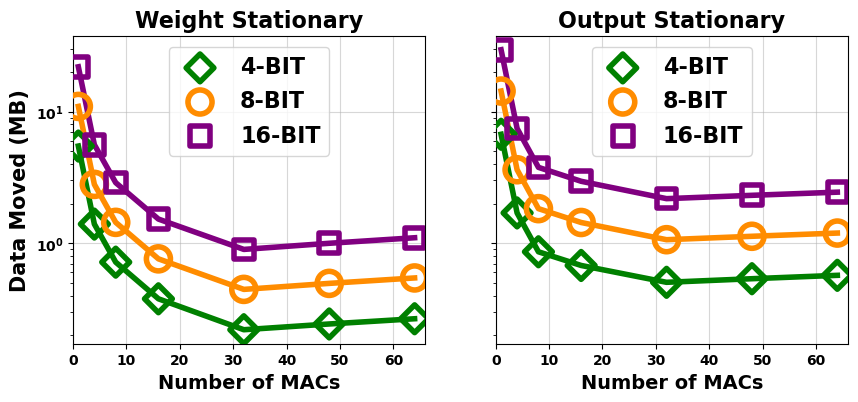

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(ncol, ws_4, label='4-BIT', linewidth=4, s=200, zorder=15, marker='D', facecolor='none', edgecolors='g')
ax2.scatter(ncol, os_4, label='4-BIT', linewidth=4, s=200, zorder=3, marker='D', facecolor='none', edgecolors='g')
ax1.plot(ncol, ws_4, c='g', linewidth=4, zorder=7)
ax2.plot(ncol, os_4, c='g', linewidth=4, zorder=2)

ax1.scatter(ncol, ws_8, label='8-BIT', linewidth=4, zorder=15, marker='o', s=300, facecolor='none', edgecolors='darkorange')
ax2.scatter(ncol, os_8, label='8-BIT', linewidth=4, zorder=4, marker='o', s=300, facecolor='none', edgecolors='darkorange')
ax1.plot(ncol, ws_8, c='darkorange', linewidth=4, zorder=7)
ax2.plot(ncol, os_8, c='darkorange', linewidth=4, zorder=2)

ax1.scatter(ncol, ws_16, label='16-BIT', linewidth=4, zorder=15, marker='s', s=200, facecolor='none', edgecolors='purple')
ax2.scatter(ncol, os_16, label='16-BIT', linewidth=4, zorder=5, marker='s', s=200, facecolor='none', edgecolors='purple')
ax1.plot(ncol, ws_16, c='purple', linewidth=4, zorder=7)
ax2.plot(ncol, os_16, c='purple', linewidth=4, zorder=2)

fig.set_figheight(4)
fig.set_figwidth(10)

ax1.legend(prop={'size': 16}, loc='upper center')
ax2.legend(prop={'size': 16}, loc='upper center')
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax1.set_title('Weight Stationary', weight='bold', fontsize=16)
ax2.set_title('Output Stationary', weight='bold', fontsize=16)

ax1.set_xlabel('Number of MACs', weight='bold', fontsize=14)
ax2.set_xlabel('Number of MACs', weight='bold', fontsize=14)
ax1.set_ylabel('Data Moved (MB)', weight='bold', fontsize=15)
ax1.set_xlim([ncol[0]-1, ncol[-1]+2])
ax2.set_xlim([ncol[0]-1, ncol[-1]+2])
ax1.set_yscale('log')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Uncomment below to save plot
#plt.savefig(f"dataMovementPlot.pdf", format='pdf', bbox_inches='tight')

Function to vary the quantization and mapping, sweep hardware dimensions for speed of inference.

In [20]:
def mnistSpeed(bits, mapping):
    result = []
    mappingUsed = mapping + "_speed"
    mpTest = mappingTests(iX=28, iY=28, iChannels=1, bitAccuracy=bits)
    for col in range(4, 64):
        for depth in range(4, 64):
            temp = [col, depth]
            temp.append(mpTest.forward_pass(mappingUsed, nrow=32, ncol=col, ndepth=depth))
            result.append(temp)
    return result

In [21]:
ws_speed = mnistSpeed(4, "ws")
os_speed = mnistSpeed(4, "os")

ws_list = np.array(ws_speed, dtype=np.float32)
os_list = np.array(os_speed, dtype=np.float32)

Xw = ws_list[:, 0]
Yw = ws_list[:, 1]
Zw = ws_list[:, 2]

Xo = os_list[:, 0]
Yo = os_list[:, 1]
Zo = os_list[:, 2]

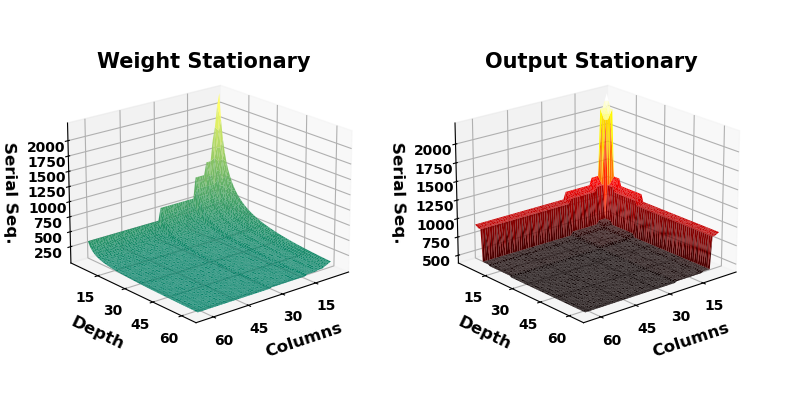

In [22]:
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

ax_ws = fig.add_subplot(121, projection = '3d')
ax_os = fig.add_subplot(122, projection = '3d')

# plotting
ax_ws.plot_trisurf(Xw, Yw, Zw, cmap='summer', linewidth=0)
ax_ws.view_init(20, 50)
ax_ws.set_xlabel('Columns', fontsize=12, labelpad=10)
ax_ws.set_ylabel('Depth', fontsize=12, labelpad=10)
ax_ws.set_zlabel('Serial Seq.', fontsize=12, labelpad=10)
ax_ws.set_title('Weight Stationary', weight='bold', fontsize=15, y=0.9)
ax_ws.set_box_aspect(aspect=None, zoom=0.8)
#ax_ws.zaxis.get_offset_text().set_visible(False)
#ax_ws.text(80, -10, 9*10**6, "1e6")

ax_os.plot_trisurf(Xo, Yo, Zo, cmap='hot', linewidth=0)
ax_os.view_init(20, 50)
ax_os.set_xlabel('Columns', weight='bold', fontsize=12, labelpad=10)
ax_os.set_ylabel('Depth', weight='bold', fontsize=12, labelpad=10)
ax_os.set_zlabel('Serial Seq.', weight='bold', fontsize=12, labelpad=10)
ax_os.set_title('Output Stationary', weight='bold', fontsize=15, y=0.9)
ax_os.set_box_aspect(aspect=None, zoom=0.8)
#ax_os.zaxis.get_offset_text().set_visible(False)
#ax_os.text(80, -10, 6*10**8, "1e8")

fig.subplots_adjust(wspace=0, hspace=0)
ax_os.xaxis.set_major_locator(plt.MaxNLocator(5))
ax_ws.xaxis.set_major_locator(plt.MaxNLocator(5))
ax_os.yaxis.set_major_locator(plt.MaxNLocator(5))
ax_ws.yaxis.set_major_locator(plt.MaxNLocator(5))

# Uncomment below to save plot
#plt.savefig("mnistSpeed.pdf", format='pdf', bbox_inches='tight')

Finding the hardware dimensions to minimise inference time.

In [23]:
# Limit the number of MACs
max_macs = 64

WS_x = Xw.copy()
WS_y = Yw.copy()
WS_points = Zw.copy()
OS_x = Xo.copy()
OS_y = Yo.copy()
OS_points = Zo.copy()

WS_x[Xw*Yw > max_macs] = np.nan
WS_y[Xw*Yw > max_macs] = np.nan
WS_points[Xw*Yw > max_macs] = np.nan

OS_x[Xo*Yo > max_macs] = np.nan
OS_y[Xo*Yo > max_macs] = np.nan
OS_points[Xo*Yo > max_macs] = np.nan

In [24]:
def min_value(mapping, x, y, z):
    minArg = np.nanargmin(z)
    print(f"{mapping} mapping inference is minimised to {z[minArg]} sequences for a {x[minArg]} x {y[minArg]} MAC array.")

min_value('WS', WS_x, WS_y, WS_points)
min_value('OS', OS_x, OS_y, OS_points)

WS mapping inference is minimised to 560.0 sequences for a 4.0 x 16.0 MAC array.
OS mapping inference is minimised to 560.0 sequences for a 8.0 x 8.0 MAC array.


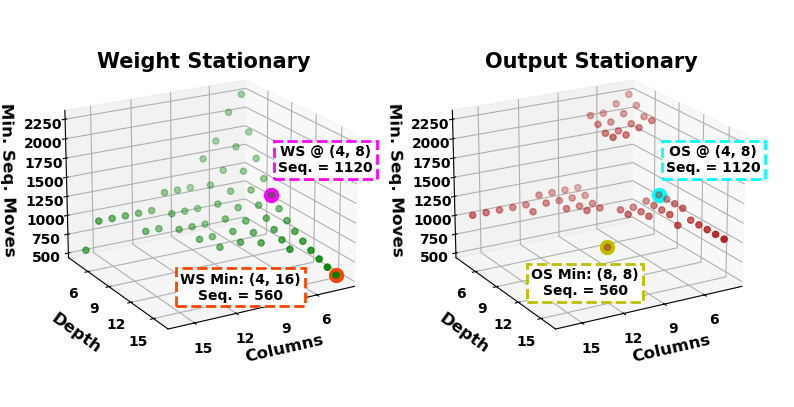

In [25]:
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()
ax_ws = fig.add_subplot(121, projection = '3d')
ax_os = fig.add_subplot(122, projection = '3d')

ax_ws.scatter(WS_x, WS_y, WS_points, color='green', zorder=2)
ax_ws.view_init(20, 60)
ax_ws.set_xlabel('Columns', fontsize=12, labelpad=5)
ax_ws.set_ylabel('Depth', fontsize=12, labelpad=10)
ax_ws.set_zlabel('Min. Seq. Moves', fontsize=12, labelpad=10)
ax_ws.set_title('Weight Stationary', weight='bold', fontsize=15, y=0.9)
ax_ws.set_box_aspect(aspect=None, zoom=0.85)

ax_os.scatter(OS_x, OS_y, OS_points, color='firebrick', zorder=2)
ax_os.view_init(20, 60)
ax_os.set_xlabel('Columns', fontsize=12, labelpad=5)
ax_os.set_ylabel('Depth', fontsize=12, labelpad=10)
ax_os.set_zlabel('Min. Seq. Moves', fontsize=12, labelpad=10)
ax_os.set_title('Output Stationary', weight='bold', fontsize=15, y=0.9)
ax_os.set_box_aspect(aspect=None, zoom=0.85)


ax_os.plot([8], [8], [560], markerfacecolor='y', markeredgecolor='y', marker='o', markersize=10)
ax_os.text(12, 12, 500, 'OS Min: (8, 8)\nSeq. = 560', size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   ec='y',
                   fc=(1, 1, 1),
                   linestyle='--',
                   linewidth=2
                   ))
ax_os.plot([4], [8], [1120], markerfacecolor='cyan', markeredgecolor='cyan', marker='o', markersize=10, zorder=1)
ax_os.text(1, 10, 1600, 'OS @ (4, 8)\nSeq. = 1120', size=10, zorder=10,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   ec='cyan',
                   fc=(1, 1, 1),
                   linestyle='--',
                   linewidth=2
                   ))
ax_ws.plot([4], [16], [560], markerfacecolor='orangered', markeredgecolor='orangered', marker='o', markersize=10, zorder=1)
ax_ws.text(10, 14, 500, 'WS Min: (4, 16)\nSeq. = 560', size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   ec='orangered',
                   fc=(1, 1, 1),
                   linestyle='--',
                   linewidth=2
                   ))
ax_ws.plot([4], [8], [1120], markerfacecolor='magenta', markeredgecolor='magenta', marker='o', markersize=10, zorder=1)
ax_ws.text(1, 10, 1600, 'WS @ (4, 8)\nSeq. = 1120', size=10, zorder=10,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   ec='magenta',
                   fc=(1, 1, 1),
                   linestyle='--',
                   linewidth=2
                   ))

fig.subplots_adjust(wspace=0, hspace=0)
ax_os.xaxis.set_major_locator(plt.MaxNLocator(5))
ax_ws.xaxis.set_major_locator(plt.MaxNLocator(5))
ax_os.yaxis.set_major_locator(plt.MaxNLocator(5))
ax_ws.yaxis.set_major_locator(plt.MaxNLocator(5))

# Uncomment below to save plot
#plt.savefig("mnistSpeed.pdf", format='pdf', bbox_inches='tight')